Exploratory Data Analysis (EDA)

In [22]:
import ssl
import certifi

ssl._create_default_https_context = lambda: ssl.create_default_context(cafile=certifi.where())

from collections import Counter

import matplotlib.pyplot as plt
import nltk
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud

from scripts.event_extraction import EventExtractor

nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("stopwords")

sns.set(style="whitegrid")


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ernapersonal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/ernapersonal/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ernapersonal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
df = pd.read_csv("../data/processed/train.csv")
df.head()

,Unnamed: 0,ID,Content,Summary,Dataset,clean_text
0,12,a1bee53abcb1e12b7da51f5ec96eda7c13398278,"(CNN) -- When it comes to India travel, the st...",India's Punjab state is home to the holiest sh...,CNN/Daily Mail,"CNN When it comes to India travel, the state o..."
1,4,b83e8bcfcd51419849160e789b6658b21a9aedcd,By . Associated Press and Daily Mail Reporter ...,A sinkhole opened up at 5:15am this morning in...,CNN/Daily Mail,By . Associated Press and Daily Mail Reporter ...
2,37,NaN,A British woman who fell from a cruise ship sa...,– A woman on a Norwegian Cruise Line ship got ...,Multi-News,A British woman who fell from a cruise ship sa...
3,8,85fa186e11686629707dc16b4bac09846ff06af1,A community stalwart with an MBE has been spar...,"Rahmat Ali Raja, 75, dishonestly claimed benef...",CNN/Daily Mail,A community stalwart with an MBE has been spar...
4,3,e12b5bd7056287049d9ec98e41dbb287bd19a981,An Ebola outbreak that began in Guinea four mo...,World Health Organisation: 635 infections and ...,CNN/Daily Mail,An Ebola outbreak that began in Guinea four mo...


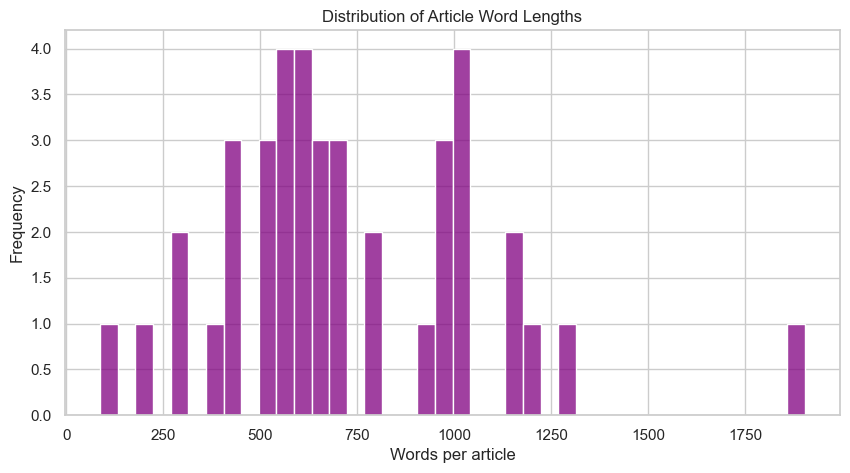

In [14]:
df["char_len"] = df["clean_text"].str.len()
df["word_len"] = df["clean_text"].str.split().str.len()

plt.figure(figsize=(10, 5))
sns.histplot(df["word_len"], bins=40, color="purple")
plt.title("Distribution of Article Word Lengths")
plt.xlabel("Words per article")
plt.ylabel("Frequency")
plt.show()

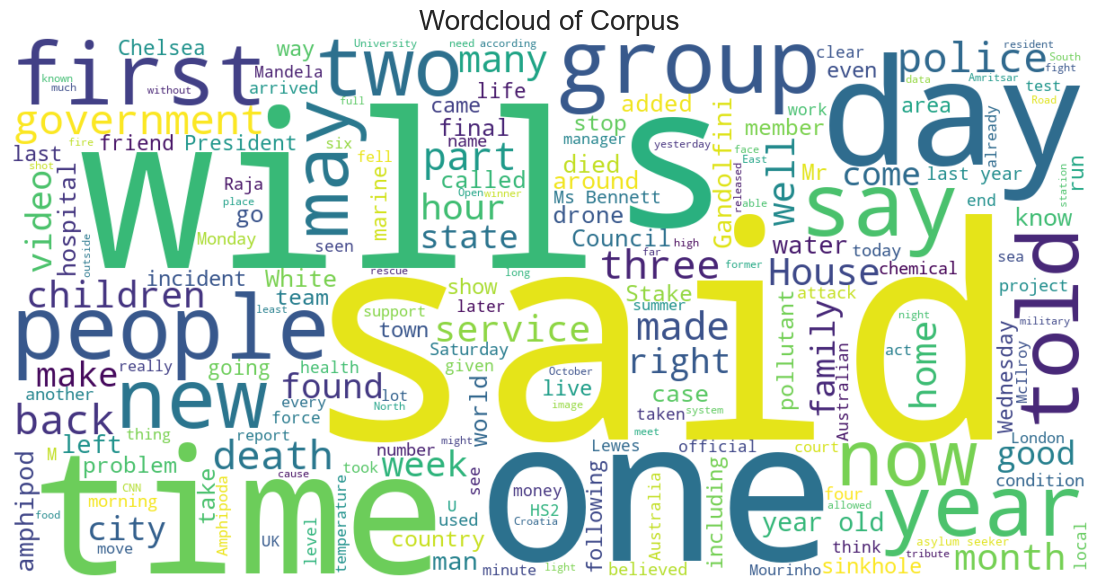

In [15]:
text = " ".join(df["clean_text"].tolist())
wordcloud = WordCloud(width=1200, height=600, background_color="white").generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud of Corpus", fontsize=20)
plt.show()


In [19]:
from nltk.tokenize import word_tokenize

words = word_tokenize(text.lower())

stopwords = set(nltk.corpus.stopwords.words("english"))
filtered = [w for w in words if w.isalnum() and w not in stopwords]

freq = Counter(filtered).most_common(30)

freq_df = pd.DataFrame(freq, columns=["word", "count"])

plt.figure(figsize=(10, 6))
sns.barplot(data=freq_df, x="count", y="word", palette="viridis")
plt.title("Top 30 Most Frequent Words")
plt.show()


ValueError: Could not interpret value `hue` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

/var/folders/b4/d444n8091h7fgqx4qqqqnlxm0000gq/T/ipykernel_33410/2740607682.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bigram_df, x="count", y="bigram", palette="magma")


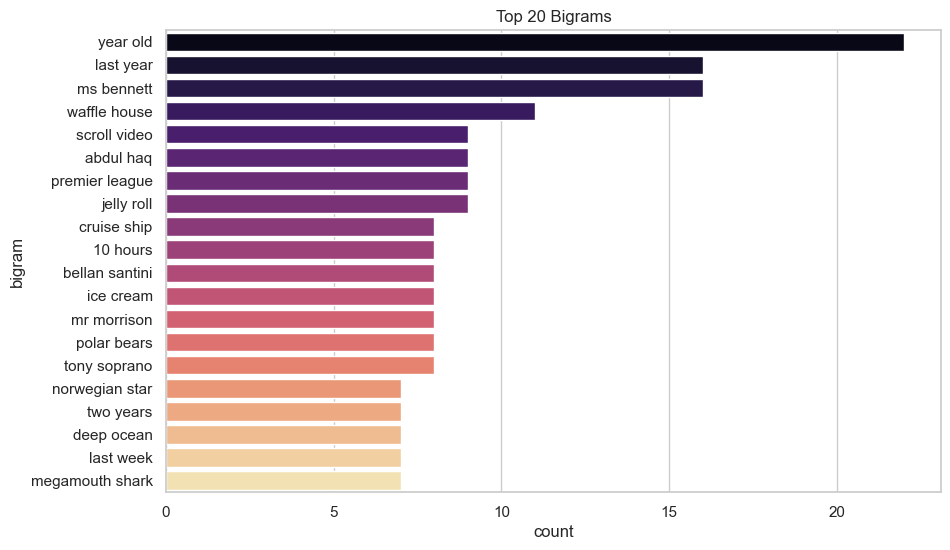

In [17]:
from nltk.util import ngrams

bigrams = Counter(ngrams(filtered, 2)).most_common(20)
bigram_df = pd.DataFrame(bigrams, columns=["bigram", "count"])

bigram_df["bigram"] = bigram_df["bigram"].apply(lambda x: " ".join(x))

plt.figure(figsize=(10, 6))
sns.barplot(data=bigram_df, x="count", y="hue", palette="magma")
plt.title("Top 20 Bigrams")
plt.show()


In [20]:
extractor = EventExtractor()

sample_entities = []
for i in range(5):
    ents = extractor.extract_entities(df.loc[i, "clean_text"])
    sample_entities.append(ents)

sample_entities


/Users/ernapersonal/PycharmProjects/event-extraction-from-news/.venv/lib/python3.10/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model

[{'ORG': ['CNN'],
  'LOC': ['India',
   'Punjab',
   'Pakistan',
   'Punjab',
   'India',
   'Harmandir Sahib Golden Temple',
   'Amritsar',
   'Harmandir Sahib Golden Temple',
   'Punjab',
   'Amrit Sarovar Pool of',
   'Nectar',
   'Darbar Sahib',
   'Sahib',
   'Golden Temple',
   'Golden Temple Road',
   'Amritsar',
   'Punjab',
   'Amritsar'],
  'MISC': ['Sikh', 'Sikh', 'Guru Granth', 'Punjabi', 'Indian']},
 {'ORG': ['Associated Press', 'Daily Mail Reporter', 'Fox'],
  'LOC': ['Florida',
   'Dunedin',
   'Florida',
   'St Petersburg',
   'Dunedin',
   'Dunedin',
   'Florida',
   'Florida',
   'Florida'],
  'PER': ['Trip Barrs', 'Michael Dup', 'Ivy Dup', 'Ivy Dup', 'Du']},
 {'MISC': ['British', 'Croatian', 'Croatian'],
  'LOC': ['Adriatic Sea',
   'P',
   '##ula',
   'Croatia',
   'Brighton',
   'Croatia',
   'Venice',
   'Italy',
   'Croatia'],
  'PER': ['Kay Longstaff',
   'Longsta',
   'Lo',
   '##ro Oreskovic',
   'Or',
   '##eskovic',
   'Or',
   '##es',
   'Kay Longsta',
   '

/var/folders/b4/d444n8091h7fgqx4qqqqnlxm0000gq/T/ipykernel_33410/1974139801.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(event_counts.keys()), y=list(event_counts.values()), palette="coolwarm")


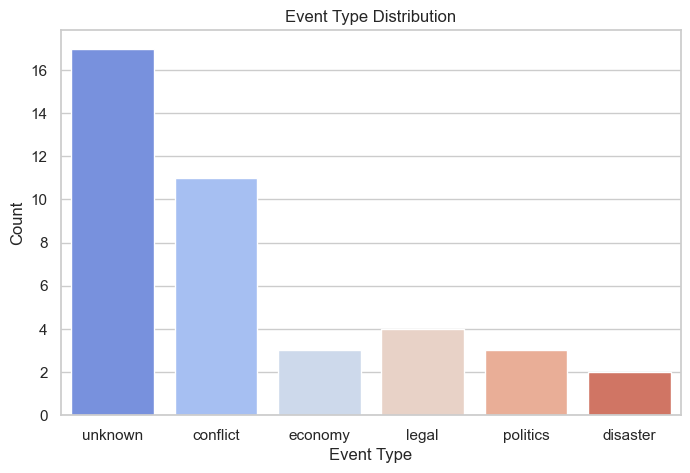

In [21]:
events = []
for text in df["clean_text"].head(200):  # just first 200 for speed
    trigger, event_type = extractor.find_event_trigger(text)
    events.append(event_type if event_type else "unknown")

event_counts = Counter(events)

plt.figure(figsize=(8, 5))
sns.barplot(x=list(event_counts.keys()), y=list(event_counts.values()), palette="coolwarm")
plt.title("Event Type Distribution")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.show()